Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']

--- Model Evaluation ---
Accuracy: 0.9532163742690059
Precision: 0.9459459459459459
Recall: 0.9813084112149533
F1 Score: 0.963302752293578
ROC AUC Score: 0.9893399532710281

Confusion Matrix:
 [[ 58   6]
 [  2 105]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        64
      benign       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



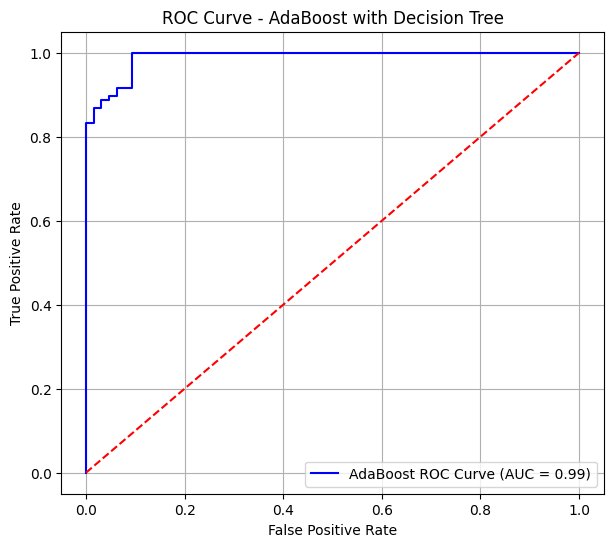

In [1]:
# ---------------------------------------------------------------
# Ex 8a - AdaBoost Classifier with Decision Tree
# Course: AI23331 - Foundations of Machine Learning
# ---------------------------------------------------------------

# 1️⃣ Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

# 2️⃣ Load dataset (Breast Cancer dataset)
data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

# 3️⃣ Split data into training and testing sets (stratified split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4️⃣ Scale data (optional but helps model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Define AdaBoost model using DecisionTreeClassifier as base estimator
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,       # number of weak learners
    learning_rate=0.5,      # controls contribution of each classifier
    random_state=42
)

# 6️⃣ Train AdaBoost model
ada_model.fit(X_train, y_train)

# 7️⃣ Evaluate model performance
y_pred = ada_model.predict(X_test)
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]

print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# 8️⃣ Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', label=f"AdaBoost ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost with Decision Tree")
plt.legend()
plt.grid()
plt.show()